In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import swifter
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /N/u/javshah/Carbonate/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/javshah/Carbonate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import swifter

In [4]:
df_new_york=pd.read_csv('nyt-comments-2020.csv',low_memory=False)

In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

def preprocess(corpus):
    #Converting text to lower case
    word_tokens_initialize=word_tokenize(corpus)
    corpus = corpus.lower()
    # Remove punctuation
    corpus = corpus.translate(str.maketrans('', '', string.punctuation))
    #remove numbers
    corpus = re.sub(r'\d+', '', corpus)
    #Reomve URLS
    corpus = re.sub(r'http\S+', '',corpus)
    # Remove non-alphabetic
    corpus = re.sub(r'[^a-zA-Z0-9\s]', '',corpus)
    #Remove Stop words
    word_tokens=word_tokenize(corpus)
    stop_words = set(stopwords.words('english'))
    word_tokens = [word for word in word_tokens if word not in stop_words]
    #Applying Stemming
    stemmer = PorterStemmer()
    word_tokens=[stemmer.stem(word) for word in word_tokens]
    corpus = ' '.join(word_tokens)
    return corpus
    

In [6]:
df_new_york['Cleaned_data']=df_new_york['commentBody'].swifter.apply(lambda x: preprocess(x))

Pandas Apply:   0%|          | 0/4986461 [00:00<?, ?it/s]

In [10]:
df_new_york.to_csv('Final_data.csv')

In [113]:
df_first_copy=df_new_york.copy()

In [78]:
df_new_york.head(10)

,commentID,status,commentSequence,userID,userDisplayName,userLocation,userTitle,commentBody,createDate,updateDate,...,parentID,parentUserDisplayName,depth,commentType,trusted,recommendedFlag,permID,isAnonymous,articleID,Cleaned_data
0,104387472,approved,104387472,60215558,magicisnotreal,earth,NaN,Here is something I think is fraudulent that v...,2020-01-01 01:05:46,2020-01-01 08:13:39,...,NaN,NaN,1,comment,0,0,104387472,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,someth think fraudul vet subject use va home l...
1,104387873,approved,104387873,65691034,JD,Elko,NaN,@magicisnotreal I have used my VA loan option...,2020-01-01 01:52:25,2020-01-01 20:55:19,...,104387472.0,magicisnotreal,2,userReply,0,0,104387873,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,magicisnotr use va loan option four time everi...
2,104387976,approved,104387976,65110053,ebmem,"Memphis, TN",NaN,@magi\n\nWhy would someone take out a VA loan ...,2020-01-01 02:06:05,2020-01-01 20:55:35,...,104387472.0,magicisnotreal,2,userReply,0,0,104387976,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,magi would someon take va loan convent loan lo...
3,104390628,approved,104390628,60215558,magicisnotreal,earth,NaN,@JD\nOut here in the Alabama of the PNW they w...,2020-01-01 14:38:50,2020-01-01 20:56:46,...,104387873.0,magicisnotreal,2,userReply,0,0,104390628,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,jd alabama pnw tri steal home heloc scam autho...
4,104391463,approved,104391463,65691034,JD,Elko,NaN,@magicisnotreal just a guess but I doubt that...,2020-01-01 16:23:14,2020-01-01 16:25:57,...,104390628.0,magicisnotreal,2,userReply,0,0,104391463,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,magicisnotr guess doubt credit union made sign...
5,104392390,approved,104392390,60215558,magicisnotreal,earth,NaN,@JD \n1st you should take note of the past ten...,2020-01-01 18:22:09,2020-01-01 18:22:11,...,104391463.0,magicisnotreal,2,userReply,0,0,104392390,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,jd st take note past tens post actual make get...
6,104387855,approved,104387855,66232009,DAWGPOUND HAR,NYC,NaN,Sick.\nBut some action now.\nHopefully.,2020-01-01 01:50:53,2020-01-01 14:11:39,...,NaN,NaN,1,comment,0,0,104387855,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,sick action hope
7,104387893,approved,104387893,73299044,K Pow,NYC,NaN,From all of this comes: Congress members love ...,2020-01-01 01:54:26,2020-01-03 12:21:08,...,NaN,NaN,1,comment,0,0,104387893,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,come congress member love money love spend isn...
8,104388059,approved,104388059,79346393,Es,Mo,NaN,"I'm a veteran, and the focus should be on prot...",2020-01-01 02:18:54,2020-01-15 00:00:21,...,NaN,NaN,1,comment,0,0,104388059,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,im veteran focu protect everybodi fraud
9,104388656,approved,104388656,85853572,mplo,"Somerville, MA--USA",NaN,"@Es \n\nI totally agree with you, Es. Well said.",2020-01-01 04:14:02,2020-01-01 17:21:03,...,104388059.0,Es,2,userReply,0,0,104388656,False,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,es total agre es well said


In [ ]:
df_new_york['commentType'].value_counts()


In [82]:
df_first_copy=df_new_york[df_new_york['commentType']=='comment']

In [114]:
df_new_york_final=df_first_copy[['Cleaned_data','editorsSelection','commentBody']]

In [115]:
df_new_york_final_01=df_new_york_final.copy()
df_new_york_final_01.shape

(4986461, 3)

In [117]:
import numpy as np
df_new_york_final_01['Cleaned_data'].replace({'':np.nan},inplace=True)


In [118]:
df_new_york_final_01=df_new_york_final_01.dropna()

# Applying Count Vectorizer to convert in matrix form Threshold 2.95 Percent

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
num_docs = len(df_new_york_final_01)
min_df_pct =0.0295
min_df = int(min_df_pct * num_docs)
min_df


147061

In [121]:
from tqdm import tqdm
#To chcek the percentage bar
from sklearn.feature_extraction.text import CountVectorizer
#Applying count vectorizer with min df as 2.7 percent
vectorizer = CountVectorizer(min_df=min_df)
#Hence we have only kept those key words whos minimum occurence is 2.7 percent in data
bag_of_words_matrix = vectorizer.fit_transform(tqdm(df_new_york_final_01['Cleaned_data']))
count_vectorizer_df= pd.DataFrame.sparse.from_spmatrix(bag_of_words_matrix, columns=vectorizer.get_feature_names())

100%|██████████| 4985132/4985132 [03:14<00:00, 25647.67it/s]


In [208]:
count_vectorizer_df.shape

(4985132, 168)

In [123]:
count_vectorizer_df['editorsSelection']=df_new_york_final_01['editorsSelection']

In [102]:
count_vectorizer_df['editorsSelection'].value_counts()

0.0    1546688
1.0      29798
Name: editorsSelection, dtype: int64

In [124]:
count_vectorizer_df['editorsSelection'] = count_vectorizer_df['editorsSelection'].replace({True:1,False:0})

In [222]:
count_vectorizer_df.shape

(4985132, 168)

In [196]:
df_sample=count_vectorizer_df.copy()
df_sample=df_sample.head(1000000)

# K means using TOU and Target Variable Error

In [213]:

import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

         
def get_random_centroids(input_dataframe,no_of_clusters):
    '''
    The function takes a dataframe as an input and creates a random K centroids from uniform distribution
    '''
    #Initialize random centroids from dataset
    list_of_centroids = []
    
    for cluster in range(no_of_clusters):
        #Generates a centroids randomly from uniform distribution 
        random_centroid = input_dataframe.swifter.apply(lambda x:float(x.sample()))
        #From the given dataset it randomly selects centroids
        list_of_centroids.append(random_centroid)
    
    centroid_df=pd.concat(list_of_centroids,axis=1)
    #Naming the column as Label for ease of purpose
    centroid_df.index.name='Cluster_Assigned'
    '''
    The function returns a dataframe consisting of no of clusters required
    '''
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    '''
    This function takes centroids as input and takes the initial dataframe and gives them labels to which cluster
    they belong to
    '''
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    #Here we use idxmin functionality to handle ties in the dataset 
    #and it randomly assigns if euclideab distance results in a tie
    '''
    This function returns the index of minimum distances as a dataframe
    '''
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    '''
    The input dataframe is the dataframe with clusters labelled and the original dataframe
    '''
    df_original_label_join=input_dataframe.join(df_clustered_label)
    #This is a dataframe that consists of datapoints as well as the cluster assigned 
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    #To get the new centroids we group by the Label column and take its mean
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    #Here transpose is taken to maintain consistency between original random centroids and 
    return new_centroids.T


def kmeans_llyod(input_dataframe,no_of_clusters,threshold,no_of_iterations):
    '''
    This function takes original dataframe,number of clusters,threshold as input.
    '''
    start_time=time.time()
    iteration=0
    #Step 1 of k means is to get random _Centroids
    initial_centroid=get_random_centroids(input_dataframe,no_of_clusters)
    #Randomly generated centroids would be stored on centroids 
    #Storing the column list to handle K ties 
    initial_centroid_column_list=initial_centroid.columns.to_list()
    
    while True:
        '''
        The while loop runs until convergence condition is met
        '''
        df_cluster_label=get_labels(input_dataframe,initial_centroid)
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        '''
        Handling (Maintaining K Centroids)
        '''
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
        
        from scipy.spatial.distance import euclidean
        scalar_product = [euclidean(initial_centroid[col],df_new_centroids[col]) for col in initial_centroid.columns]
        threshold_calculated=float(sum(scalar_product))/no_of_clusters
        
        iteration+=1
        
        if threshold_calculated<threshold:
            print("The input Threshold was {}".format(threshold))
            print("The calculated threshold is {}".format(threshold_calculated))
        
        if iteration>no_of_iterations:
            print("Limit for iterations has exceeded")
        
        if threshold_calculated<threshold or iteration>no_of_iterations:
            error=cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids)
            sum_of_square_error=sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters)
            end_time=time.time()
            return df_new_centroids,error,sum_of_square_error,end_time-start_time
            break
        else:
            initial_centroid= df_new_centroids
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    '''
    This function calculates the euclidean distance between new formed 
    centroids and the datapoints in that cluster
    '''
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(np.nansum(euclidean_distance))
    
    return round(np.nansum(total_error),3)
    #return round(float(''.join(map(str, sum(total_error)))),3)
        
        
        
def cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids):
    '''
    This calculates the error for every cluster and sums up the error based on the formula for error
    '''
    
    target_variable_centroid=input_dataframe.groupby('editorsSelection').mean().reset_index()
    '''
    Target variable centroid is input dataframe taking mean
    '''
    new_centroids= df_new_centroids.T
    #
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)

    # Get the columns of the data dataframe
    columns = input_dataframe.columns

    sum_of_square_Error= []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   
        s=[]
        for j in range(len(target_variable_centroid)): ### mean centroid
            #Calculating the error between target variable centroid and new centroids
            distance = np.sum(np.square(target_variable_centroid[target_variable_centroid['editorsSelection']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            #Storing the distance
            s.append(distance.iloc[0])
        sum_of_square_Error.append(s)
    
    
    merged_new_label=pd.DataFrame(sum_of_square_Error).idxmin(axis=1)
    
    #Merging of cluster
    mapping_dictionary=merged_new_label.to_dict() 
    
    #Getting clusters to a new column
    df_data_label['target_variable_cluster']=df_data_label['Cluster_Assigned'].replace(mapping_dictionary)
    
    
    total_cluster_error = []
    
    for class_name in range(0,2):
        df_cluster = df_data_label[df_data_label['target_variable_cluster'] == class_name] 
        yi = len(df_cluster[df_cluster['editorsSelection'] == 1]) 
        #Calculating Ni
        ni = len(df_cluster[df_cluster['editorsSelection'] == 0]) 
        if yi == 0 and ni == 0:
            error_ci = 0
        else:
            error_ci = ni / (ni + yi) # calculate the error rate of the current cluster
        total_cluster_error.append(error_ci)
    return round(sum(total_cluster_error),3)

# Running K means Llyod Multiple times

In [254]:
df_sample=count_vectorizer_df.copy()
df_sample=df_sample.head(100000)

In [255]:
error_values=[]
for no_of_clusters in range(2,6):
    #Taking the cluster value from 2 to 5
    for no_of_experiments in range(1,21):
        #Performing experiments for each cluster 20 times
        final_centroids,error_target_variable,sum_of_squared_error,run_time=kmeans_llyod(df_sample,no_of_clusters,10,100)
        #Storing the variables in dataframe
        error_values.append([no_of_clusters,no_of_experiments,error_target_variable,sum_of_squared_error,run_time])
error_values_df= pd.DataFrame(error_values,columns=['No_of_Clusters', 'Iteration Number', 'Target Variable Error','Sum_of_squared_Errors','run_time'])  
error_values_df.to_csv('Kmeans_llyod_20_iteration_1lakh.csv')

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.0000275941362426


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.9889074533447095


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.475792541360282


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.990976871777917


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.5779749268388104


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.123125833222991


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.000026034491551


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.8660581744640226


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.182892597608144


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.5981133979091515


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 9.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.496627502204818


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.7687041455015926


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.300788479950518


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.1621278568807325


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.415506628126972


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.529163672158231


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.224775236881168


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.1050624562329108


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.158338986889259


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.9921667359507342


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.1868662090614053


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 5.148936634504957


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 9.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.074574276823333


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.1547250164591993


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 1.9470164489247666


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 25.0, 49.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.8981445895493994


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.129316020821632


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.078717908281345


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.4914238965617415


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.9704273947174844


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.9854568952847367


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.4397742628269246


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 49.0, 64.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.889220822092711


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.5134021328135465


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.9607277634025335


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.766882145893503


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.6818085315955575


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.592625956232248


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.566758910686048


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.504690284878657


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.5232099282949925


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.955997397975571


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.9328240716678478


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.309592283159411


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 16.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.4626680033947848


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.1335088043295034


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 25.0, 9.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.9989098893707484


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 9.0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.059252621370557


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 16.0, 9.0, 81.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 16.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 64.0, 1.0, 4.0, 16.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 5.86976419055695


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.3012871659434313


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.914636447835405


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.318487831479409


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.02114792768937


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.071427259351049


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.95024173853201


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.44917336731032


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.923661700197554


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.722607762415134


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.565124773107823


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.8820735980978287


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.2944615398790837


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.5269985267664525


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.2617538558400976


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.688281583500657


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 36.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 16.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.841283407228309


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.7541175875699855


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.849828549248


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.517233708101272


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.079265910305219


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the 

The input Threshold was 10
The calculated threshold is 4.0525378929806966


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.4419920785171767


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.7578212768354127


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 16.0, 36.0]'. Picking the

The input Threshold was 10
The calculated threshold is 3.2504226293689227


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.6427180118692917


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.569335864408827


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and c

The input Threshold was 10
The calculated threshold is 2.7794293898135374


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.236125447355191


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.9264363187227493


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.7578169003571795


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 9.0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/3452164459.py:51: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0, 16.0]

The input Threshold was 10
The calculated threshold is 5.04499083307457


# Done both the dataframes

In [264]:
error_values_df

,No_of_Clusters,Iteration Number,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1,0.987,324552.550,10.644651
1,2,2,0.987,323808.672,11.224484
2,2,3,0.987,324135.854,10.483995
3,2,4,0.987,319224.160,10.656195
4,2,5,0.987,322792.602,10.692482
...,...,...,...,...,...
75,5,16,0.987,320049.564,16.136392
76,5,17,0.987,322130.155,16.076394
77,5,18,0.987,318237.758,16.147666
78,5,19,0.987,315744.064,16.227921


In [268]:
error_plot=error_values_df.groupby(['No_of_Clusters']).mean().reset_index()[['No_of_Clusters','Target Variable Error','Sum_of_squared_Errors','run_time']]
error_plot

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,0.987,323264.92750,10.678611
1,3,0.987,321638.51665,12.615516
2,4,0.987,322363.83065,14.404066
3,5,0.987,320988.60535,16.202976


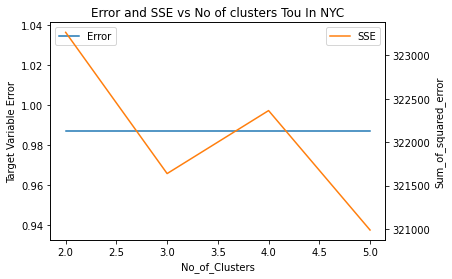

In [305]:
ax = error_plot.plot(x='No_of_Clusters', y='Target Variable Error')
ax2 =error_plot.plot(x='No_of_Clusters', y='Sum_of_squared_Errors',secondary_y=True, ax=ax)
# set the axis labels and title
ax.set_xlabel('No_of_Clusters')
ax.set_ylabel('Target Variable Error')
ax2.set_ylabel('Sum_of_squared_error')
ax.set_title('Error and SSE vs No of clusters Tou In NYC')
ax.legend(['Error'], loc='upper left')
ax2.legend(['SSE'], loc='upper right')

plt.show()

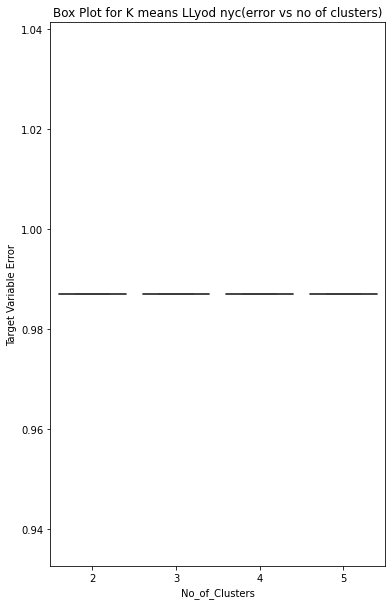

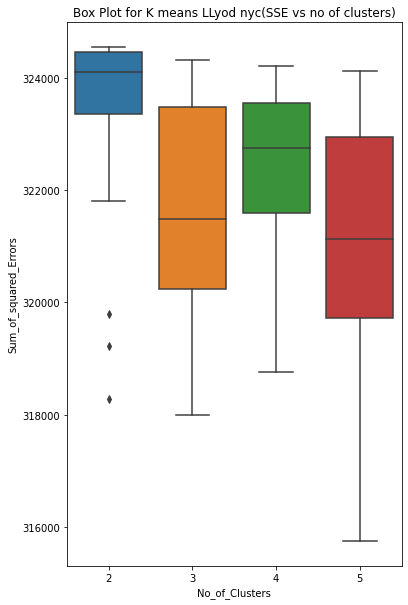

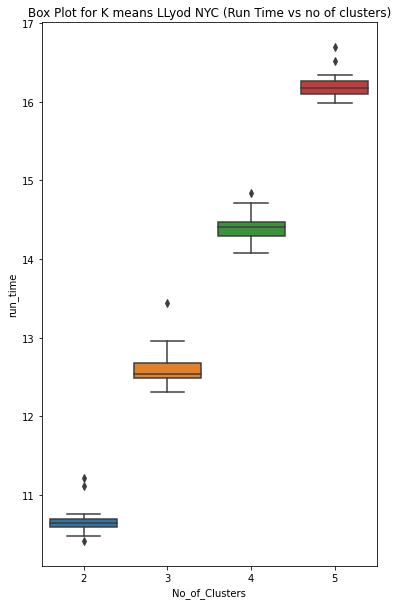

In [302]:
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_df['No_of_Clusters'],y=error_values_df['Target Variable Error'])
plt.title('Box Plot for K means LLyod nyc(error vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_df['No_of_Clusters'],y=error_values_df['Sum_of_squared_Errors'])
plt.title('Box Plot for K means LLyod nyc(SSE vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_df['No_of_Clusters'],y=error_values_df['run_time'])
plt.title('Box Plot for K means LLyod NYC (Run Time vs no of clusters)')
plt.show()


# K means Plus Plus 

In [232]:

import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

         
def kmeans_pp_init(input_dataframe,no_of_clusters):
    '''
    K-means++ is a variant of the K-means algorithm that aims to improve the initial centroids' selection 
    in the clustering process. 
    The standard K-means algorithm initializes the cluster centroids randomly, 
    which can lead to suboptimal clustering results, 
    especially if the dataset has complex or irregular structures.
    '''
    list_of_centroids=[]
    #Choosing the first centroid randomly
    centroid = input_dataframe.apply(lambda x: float(x.sample()))
    list_of_centroids.append(centroid)
    
    iterator=2
    while iterator<=no_of_clusters:
        '''
        Calculating the distances from the centroid to every data point
        If the no of centroids are more than 1 calculate the distance from every centroid and take minimum distance
        '''
        distances = np.array(np.amin(cdist(input_dataframe,list_of_centroids,metric='euclidean'),axis=1))
        #Next centroid will be selected with probability proportional to the distance
        
        probs = distances / np.nansum(distances)
        probs = [0 if np.isnan(x) else x for x in probs]
        '''
        Selection of the next centroids
        '''
        next_centroid = input_dataframe.iloc[np.random.choice(len(input_dataframe),p=probs)]
        list_of_centroids.append(next_centroid)
        iterator+=1
    
    centroid_df=pd.concat(list_of_centroids,axis=1,ignore_index=True)
    #Naming the column as Label for ease of purpose
    centroid_df.index.name='Cluster_Assigned'   
    
        
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    '''
    This function takes centroids as input and takes the initial dataframe and gives them labels to which cluster
    they belong to
    '''
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    #Here we use idxmin functionality to handle ties in the dataset 
    #and it randomly assigns if euclideab distance results in a tie
    '''
    This function returns the index of minimum distances as a dataframe
    '''
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    '''
    The input dataframe is the dataframe with clusters labelled and the original dataframe
    '''
    df_original_label_join=input_dataframe.join(df_clustered_label)
    #This is a dataframe that consists of datapoints as well as the cluster assigned 
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    #To get the new centroids we group by the Label column and take its mean
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    #Here transpose is taken to maintain consistency between original random centroids and 
    return new_centroids.T


def kmeans_llyod_kpp(input_dataframe,no_of_clusters,threshold,no_of_iterations):
    '''
    This function takes original dataframe,number of clusters,threshold as input.
    '''
    start_time=time.time()
    iteration=0
    #Step 1 of k means is to get random _Centroids
    initial_centroid=kmeans_pp_init(input_dataframe,no_of_clusters)
    #Randomly generated centroids would be stored on centroids 
    #Storing the column list to handle K ties 
    initial_centroid_column_list=initial_centroid.columns.to_list()
    
    while True:
        '''
        The while loop runs until convergence condition is met
        '''
        df_cluster_label=get_labels(input_dataframe,initial_centroid)
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        '''
        Handling (Maintaining K Centroids)
        '''
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
        
        from scipy.spatial.distance import euclidean
        scalar_product = [euclidean(initial_centroid[col],df_new_centroids[col]) for col in initial_centroid.columns]
        threshold_calculated=float(sum(scalar_product))/no_of_clusters
        
        iteration+=1
        
        if threshold_calculated<threshold:
            print("The input Threshold was {}".format(threshold))
            print("The calculated threshold is {}".format(threshold_calculated))
        
        if iteration>no_of_iterations:
            print("Limit for iterations has exceeded")
        
        if threshold_calculated<threshold or iteration>no_of_iterations:
            error=cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids)
            sum_of_square_error=sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters)
            end_time=time.time()
            return df_new_centroids,error,sum_of_square_error,end_time-start_time
            break
        else:
            initial_centroid= df_new_centroids
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    '''
    This function calculates the euclidean distance between new formed 
    centroids and the datapoints in that cluster
    '''
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(np.nansum(euclidean_distance))
    
    return round(np.nansum(total_error),3)
    #return round(float(''.join(map(str, sum(total_error)))),3)
        
        
        
def cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids):
    '''
    This calculates the error for every cluster and sums up the error based on the formula for error
    '''
    
    target_variable_centroid=input_dataframe.groupby('editorsSelection').mean().reset_index()
    '''
    Target variable centroid is input dataframe taking mean
    '''
    new_centroids= df_new_centroids.T
    #
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)

    # Get the columns of the data dataframe
    columns = input_dataframe.columns

    sum_of_square_Error= []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   
        s=[]
        for j in range(len(target_variable_centroid)): ### mean centroid
            #Calculating the error between target variable centroid and new centroids
            distance = np.sum(np.square(target_variable_centroid[target_variable_centroid['editorsSelection']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            #Storing the distance
            s.append(distance.iloc[0])
        sum_of_square_Error.append(s)
    
    
    merged_new_label=pd.DataFrame(sum_of_square_Error).idxmin(axis=1)
    
    #Merging of cluster
    mapping_dictionary=merged_new_label.to_dict() 
    
    #Getting clusters to a new column
    df_data_label['target_variable_cluster']=df_data_label['Cluster_Assigned'].replace(mapping_dictionary)
    
    
    total_cluster_error = []
    
    for class_name in range(0,2):
        df_cluster = df_data_label[df_data_label['target_variable_cluster'] == class_name] 
        yi = len(df_cluster[df_cluster['editorsSelection'] == 1]) 
        #Calculating Ni
        ni = len(df_cluster[df_cluster['editorsSelection'] == 0]) 
        if yi == 0 and ni == 0:
            error_ci = 0
        else:
            error_ci = ni / (ni + yi) # calculate the error rate of the current cluster
        total_cluster_error.append(error_ci)
    return round(sum(total_cluster_error),3)

In [309]:
error_values_kmeans_plus_plus=[]
for no_of_clusters in range(2,6):
    #Taking the cluster value from 2 to 5
    for no_of_experiments in range(1,21):
        #Performing experiments for each cluster 20 times
        final_centroids,error_target_variable,sum_of_squared_error,run_time=kmeans_llyod_kpp(count_vectorizer_df,no_of_clusters,10,100)
        #Storing the variables in dataframe
        error_values_kmeans_plus_plus.append([no_of_clusters,no_of_experiments,error_target_variable,sum_of_squared_error,run_time])
error_values_kmeans_plus_plus_df= pd.DataFrame(error_values_kmeans_plus_plus,columns=['No_of_Clusters', 'Iteration Number', 'Target Variable Error','Sum_of_squared_Errors','run_time'])  
error_values_kmeans_plus_plus_df.to_csv('KPP_NYC_Full_data_02.csv')

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.114234309717363


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.0300178079579916


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 5.340588085726059


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.889993977572522


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 1.9840929423550548


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 100.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 6.531147818883758


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 1.866060837323968


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.5476463767581263


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.8643456690828097


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 9.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.412623971225699


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.106818860175558


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.107818990955056


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 1.8251785855252245


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.3132093194745815


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.451986527746174


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.837779187733876


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 5.243839250004834


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 1.4199442317829605


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.5779660776369515


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 1.3660772894757316


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.60933101450236


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 9.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.5395007242652365


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 36.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.1267441448242


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.894084323200623


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.036374002808093


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.093065294045931


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.330825689507702


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.8213843867714257


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 16.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.2577268763688005


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.119436665428189


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.1900487023216484


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.507785446692818


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.680506343441075


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.3946711806206835


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.641247530936108


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[9.0, 0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.332680331205307


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0, 25.0, 64.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 6.761880389657901


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.0951505820840772


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 5.35037385854589


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.690837011918018


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.4934679118921617


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.033960667950386


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.550793731093834


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.299644603181811


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.456325907527936


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.782230581198005


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.9268457321177213


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.7889946665313876


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 9.0, 4.0, 16.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.068917949404375


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.4625202378166797


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 16.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.901284517101721


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.431240191978611


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.9381756191069917


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.6249968198540863


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0, 36.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.26110964899275


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0, 81.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.7284193500127327


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.70212956571671


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.908627151583565


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 4.42514199653251


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.8019179809599812


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 16.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.8595164115400173


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.86726365670401


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the 

The input Threshold was 10
The calculated threshold is 4.146311141260837


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 25.0, 4.0]'. P

The input Threshold was 10
The calculated threshold is 4.287883904265002


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.0316706004101657


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.4564736091303674


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0, 4.0, 9.0

The input Threshold was 10
The calculated threshold is 4.695563032998441


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.042712750111284


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 25.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.6827858643887175


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the

The input Threshold was 10
The calculated threshold is 4.064549090151045


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.4438647482694433


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[1.0, 0, 4.0, 16.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.4777743028114805


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.4077464458753832


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.108263739090899


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first 

The input Threshold was 10
The calculated threshold is 3.734535766795555


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0, 16.0, 64.0

The input Threshold was 10
The calculated threshold is 4.877840258140135


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 2.512127890187649


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 16.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0, 16.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0

The input Threshold was 10
The calculated threshold is 4.829934684516469


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0, 9.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 16.0, 1.0, 4.0]'. Picking the 

The input Threshold was 10
The calculated threshold is 3.9056594650384175


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 4.0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0, 9.0, 4.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
/tmp/ipykernel_2816/2434844461.py:34: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[0, 1.0]'. Picking the first and converting the rest.
  euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))


The input Threshold was 10
The calculated threshold is 3.0329879875537373


# Done both the dataframes

In [312]:
error_values_kmeans_plus_plus_df

,No_of_Clusters,Iteration Number,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1,0.989,1.726854e+07,800.939299
1,2,2,0.989,1.726063e+07,805.787635
2,2,3,0.989,1.726267e+07,796.297279
3,2,4,0.989,1.728654e+07,792.505020
4,2,5,0.989,1.728654e+07,823.165903
...,...,...,...,...,...
75,5,16,0.989,1.721090e+07,1168.479554
76,5,17,0.989,1.722527e+07,1173.650828
77,5,18,0.989,1.727298e+07,1180.923944
78,5,19,0.989,1.725865e+07,1179.962063


In [313]:
error_plot_kmeans_plus_plus=error_values_kmeans_plus_plus_df.groupby(['No_of_Clusters']).mean().reset_index()[['No_of_Clusters','Target Variable Error','Sum_of_squared_Errors','run_time']]
error_plot_kmeans_plus_plus

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,0.989,1.725596e+07,814.231649
1,3,0.989,1.721939e+07,951.759722
2,4,0.989,1.717659e+07,1098.082392
3,5,0.989,1.718479e+07,1169.901751


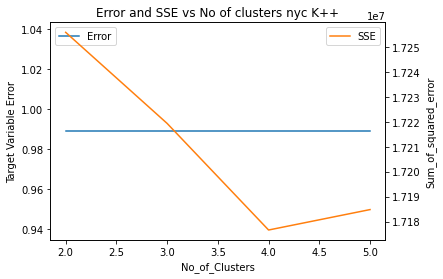

In [314]:
ax = error_plot_kmeans_plus_plus.plot(x='No_of_Clusters', y='Target Variable Error')
ax2=error_plot_kmeans_plus_plus.plot(x='No_of_Clusters', y='Sum_of_squared_Errors',secondary_y=True, ax=ax)
# set the axis labels and title
ax.set_xlabel('No_of_Clusters')
ax.set_ylabel('Target Variable Error')
ax2.set_ylabel('Sum_of_squared_error')
ax.set_title('Error and SSE vs No of clusters nyc K++')
ax.legend(['Error'], loc='upper left')
ax2.legend(['SSE'], loc='upper right')

plt.show()

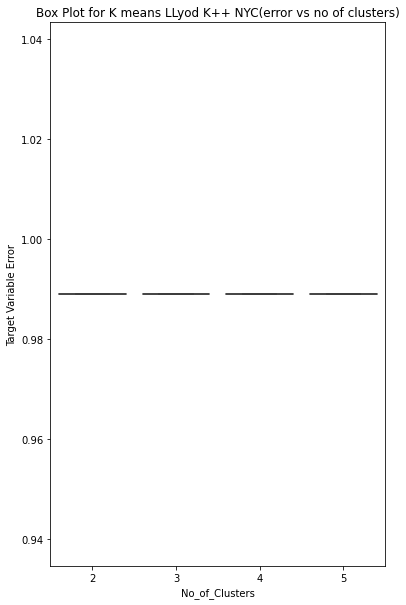

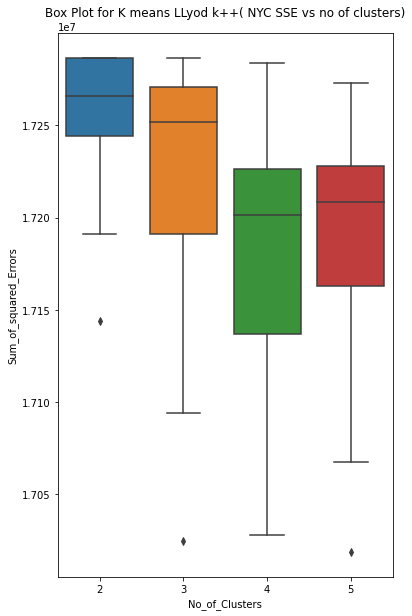

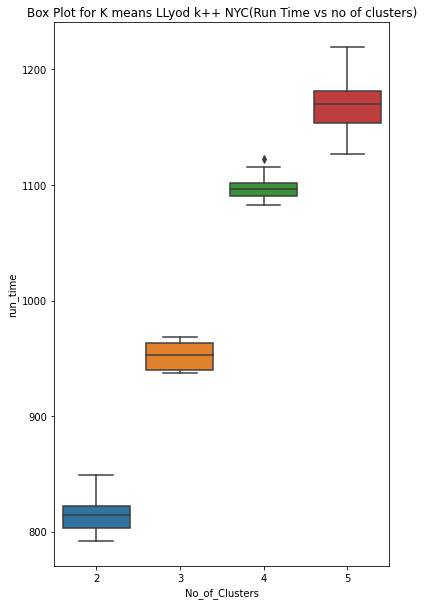

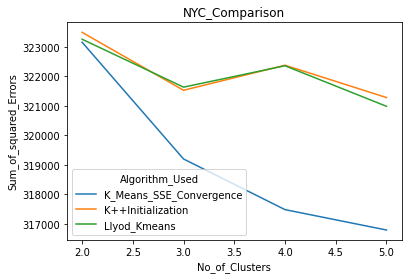

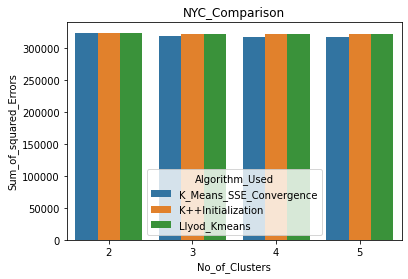

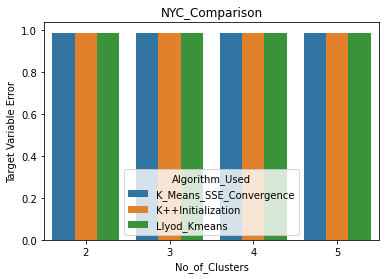

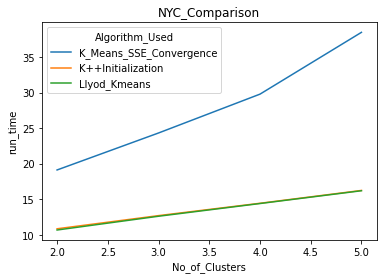

In [315]:
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_plus_plus_df['No_of_Clusters'],y=error_values_kmeans_plus_plus_df['Target Variable Error'])
plt.title('Box Plot for K means LLyod K++ NYC(error vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_plus_plus_df['No_of_Clusters'],y=error_values_kmeans_plus_plus_df['Sum_of_squared_Errors'])
plt.title('Box Plot for K means LLyod k++( NYC SSE vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_plus_plus_df['No_of_Clusters'],y=error_values_kmeans_plus_plus_df['run_time'])
plt.title('Box Plot for K means LLyod k++ NYC(Run Time vs no of clusters)')
plt.show()
sns.lineplot(x="No_of_Clusters", y="Sum_of_squared_Errors", hue="Algorithm_Used", data=k_means_metric)
plt.title('NYC_Comparison')
plt.show()
sns.barplot(x="No_of_Clusters", y="Sum_of_squared_Errors", hue="Algorithm_Used", data=k_means_metric)
plt.title('NYC_Comparison')
plt.show()
sns.barplot(x="No_of_Clusters", y="Target Variable Error", hue="Algorithm_Used", data=k_means_metric)
plt.title('NYC_Comparison')
plt.show()
sns.lineplot(x="No_of_Clusters", y="run_time", hue="Algorithm_Used", data=k_means_metric)
plt.title('NYC_Comparison')
plt.show()


# Entire Dataset 

In [279]:
df=pd.read_csv('KPP_NYC.csv')

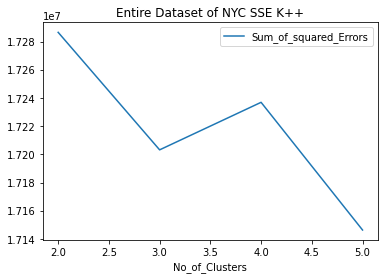

In [282]:
df.plot(x='No_of_Clusters', y='Sum_of_squared_Errors')
plt.title('Entire Dataset of NYC SSE K++')
plt.show()

In [270]:
error_values_kmeans_convergence['Algorithm_Used']='K_Means_SSE_Convergence'
error_plot_kmeans_plus_plus['Algorithm_Used']='K++Initialization'
error_plot['Algorithm_Used']='Llyod_Kmeans'

In [271]:
k_means_metric=pd.concat([error_values_kmeans_convergence,error_plot_kmeans_plus_plus,error_plot],axis=0)

In [272]:
k_means_metric

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time,Algorithm_Used
0,2,0.987,323164.41775,19.125082,K_Means_SSE_Convergence
1,3,0.987,319200.39895,24.326908,K_Means_SSE_Convergence
2,4,0.987,317481.20300,29.791367,K_Means_SSE_Convergence
3,5,0.987,316789.35695,38.485259,K_Means_SSE_Convergence
0,2,0.987,323498.74155,10.852976,K++Initialization
1,3,0.987,321531.79425,12.703271,K++Initialization
2,4,0.987,322382.79765,14.441150,K++Initialization
3,5,0.987,321286.16060,16.245698,K++Initialization
0,2,0.987,323264.92750,10.678611,Llyod_Kmeans
1,3,0.987,321638.51665,12.615516,Llyod_Kmeans


# K means using SSE

In [260]:

import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

         
def get_random_centroids(input_dataframe,no_of_clusters):
    '''
    The function takes a dataframe as an input and creates a random K centroids from uniform distribution
    '''
    #Initialize random centroids from dataset
    list_of_centroids = []
    
    for cluster in range(no_of_clusters):
        #Generates a centroids randomly from uniform distribution 
        random_centroid = input_dataframe.swifter.apply(lambda x:float(x.sample()))
        #From the given dataset it randomly selects centroids
        list_of_centroids.append(random_centroid)
    
    centroid_df=pd.concat(list_of_centroids,axis=1)
    #Naming the column as Label for ease of purpose
    centroid_df.index.name='Cluster_Assigned'
    '''
    The function returns a dataframe consisting of no of clusters required
    '''
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    '''
    This function takes centroids as input and takes the initial dataframe and gives them labels to which cluster
    they belong to
    '''
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    #Here we use idxmin functionality to handle ties in the dataset 
    #and it randomly assigns if euclideab distance results in a tie
    '''
    This function returns the index of minimum distances as a dataframe
    '''
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    '''
    The input dataframe is the dataframe with clusters labelled and the original dataframe
    '''
    df_original_label_join=input_dataframe.join(df_clustered_label)
    #This is a dataframe that consists of datapoints as well as the cluster assigned 
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    #To get the new centroids we group by the Label column and take its mean
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    #Here transpose is taken to maintain consistency between original random centroids and 
    return new_centroids.T


def kmeans_SSE_Convergence(input_dataframe,no_of_clusters,sum_of_squared_threshold,no_of_iterations):
    '''
    Treats K means as an optimization Problem and stops when difference in SSE reaches a threshold
    The input to the function is the dataframe,no of clusters and a threshold which indicates the perecentage change
    It indicates user can set the percentage change in the SSE and once the percentage change in SSE drops to the 
    Threshold we can see the algorithm has converged
    '''
    start_time=time.time()
    iteration=0
    #Step 1 of k means is to get random _Centroids
    initial_centroid=get_random_centroids(input_dataframe,no_of_clusters)
    #Randomly generated centroids would be stored on centroids 
    #Storing the column list to handle K ties 
    initial_centroid_column_list=initial_centroid.columns.to_list()
    #Get initial labels
    df_cluster_label=get_labels(input_dataframe,initial_centroid)
    #Compute the initial Sum of squared Errors
    initial_sum_of_squared_errors=sum_of_square_error_function(df_cluster_label,input_dataframe,initial_centroid,no_of_clusters)
    
    
    while True:
        '''
        The while loop runs until convergence condition is met
        '''
        
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        '''
        Handling (Maintaining K Centroids)
        '''
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
            
        '''
        Assigning labels to new centroids
        '''
        df_cluster_label_iter=get_labels(input_dataframe,df_new_centroids)
        '''
        Calculating the current SSE
        
        '''
        updated_sum_of_squared_errors=sum_of_square_error_function(df_cluster_label_iter,input_dataframe,df_new_centroids,no_of_clusters)
        
        #Calculating the convergence criteria
        
        percentage_change=((initial_sum_of_squared_errors-updated_sum_of_squared_errors)/(initial_sum_of_squared_errors))*100
        
        iteration+=1
        #Stopping criteria
        #Indicating new clusters have reduced the SSE
        if percentage_change>0:
            if percentage_change>=sum_of_squared_threshold or iteration>no_of_iterations:
                print("The input SSE Threshold was {}".format(sum_of_squared_threshold))
                print("The percentage change is {}".format(percentage_change))
                print("The initial error was {} and final error was {}".format(initial_sum_of_squared_errors,updated_sum_of_squared_errors))
                error=cluster_error_target_variable(df_cluster_label_iter,input_dataframe,no_of_clusters,df_new_centroids)
                end_time=time.time()
                return df_new_centroids,error,updated_sum_of_squared_errors,end_time-start_time
                break
                
        else:
            initial_centroid= df_new_centroids
            df_cluster_label=df_cluster_label_iter
            initial_sum_of_squared_errors=updated_sum_of_squared_errors
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    '''
    This function calculates the euclidean distance between new formed 
    centroids and the datapoints in that cluster
    '''
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(np.nansum(euclidean_distance))
    
    return round(np.nansum(total_error),3)
        
        
        
def cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids):
    '''
    This calculates the error for every cluster and sums up the error based on the formula for error
    '''
    
    target_variable_centroid=input_dataframe.groupby('editorsSelection').mean().reset_index()
    '''
    Target variable centroid is input dataframe taking mean
    '''
    new_centroids= df_new_centroids.T
    #
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)

    # Get the columns of the data dataframe
    columns = input_dataframe.columns

    sum_of_square_Error= []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   
        s=[]
        for j in range(len(target_variable_centroid)): ### mean centroid
            #Calculating the error between target variable centroid and new centroids
            distance = np.sum(np.square(target_variable_centroid[target_variable_centroid['editorsSelection']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            #Storing the distance
            s.append(distance.iloc[0])
        sum_of_square_Error.append(s)
    
    
    merged_new_label=pd.DataFrame(sum_of_square_Error).idxmin(axis=1)
    
    #Merging of cluster
    mapping_dictionary=merged_new_label.to_dict() 
    
    #Getting clusters to a new column
    df_data_label['target_variable_cluster']=df_data_label['Cluster_Assigned'].replace(mapping_dictionary)
    
    
    total_cluster_error = []
    
    for class_name in range(0,2):
        df_cluster = df_data_label[df_data_label['target_variable_cluster'] == class_name] 
        yi = len(df_cluster[df_cluster['editorsSelection'] == 1]) 
        #Calculating Ni
        ni = len(df_cluster[df_cluster['editorsSelection'] == 0]) 
        if yi == 0 and ni == 0:
            error_ci = 0
        else:
            error_ci = ni / (ni + yi) # calculate the error rate of the current cluster
        total_cluster_error.append(error_ci)
    return round(sum(total_cluster_error),3)

In [311]:
error_values_kmeans_convergence=[]
for no_of_clusters in range(2,6):
    #Taking the cluster value from 2 to 5
    for no_of_experiments in range(1,21):
        #Performing experiments for each cluster 20 times
        final_centroids,error_target_variable,sum_of_squared_error,run_time=kmeans_SSE_Convergence(count_vectorizer_df,no_of_clusters,10,100)
        #Storing the variables in dataframe
        error_values_kmeans_convergence.append([no_of_clusters,no_of_experiments,error_target_variable,sum_of_squared_error,run_time])
error_values_kmeans_convergence_df_full= pd.DataFrame(error_values_kmeans_convergence,columns=['No_of_Clusters', 'Iteration Number', 'Target Variable Error','Sum_of_squared_Errors','run_time'])  
error_values_kmeans_convergence_df_full.to_csv('nyc_Sse_data_fukk_data_03_march.csv')

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.313666373168832
The initial error was 21424358.949 and final error was 17286529.739


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 28.551935018706782
The initial error was 23764943.842 and final error was 16979592.519


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 15.12616221551244
The initial error was 20309161.896 and final error was 17237165.123


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 37.77462193101246
The initial error was 27780522.196 and final error was 17286534.966


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.333142169022253
The initial error was 21795037.525 and final error was 17145471.184


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 29.7167208475411
The initial error was 24220964.446 and final error was 17023288.055


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.993282620209214
The initial error was 21079414.952 and final error was 17286536.245


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 15.159933488145011
The initial error was 20375443.147 and final error was 17286539.518


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 20.78872183498947
The initial error was 21785696.855 and final error was 17256728.936


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 27.919971867034416
The initial error was 23982424.391 and final error was 17286538.248


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 24.487574457073418
The initial error was 22892304.037 and final error was 17286534.041


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 30.885868663324178
The initial error was 24726030.468 and final error was 17089181.172


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 22.098084240730902
The initial error was 21936792.883 and final error was 17089181.912


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 38.92244974280853
The initial error was 28235915.77 and final error was 17245805.645


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 27.35974499073062
The initial error was 23631583.961 and final error was 17166042.852


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 35.02339218264382
The initial error was 26199101.184 and final error was 17023287.228


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 32.23311746017494
The initial error was 25508775.188 and final error was 17286501.719


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 30.069245356832315
The initial error was 24719500.459 and final error was 17286533.215


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 48.5301151133681
The initial error was 33585737.903 and final error was 17286540.637


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 33.279892982831896
The initial error was 25863915.943 and final error was 17256432.396


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 30.381716746222708
The initial error was 24389520.062 and final error was 16979565.161


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.386056327445406
The initial error was 21894864.169 and final error was 17212416.185


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 27.325496735887768
The initial error was 23786232.817 and final error was 17286526.545


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 22.613508174374015
The initial error was 22155632.635 and final error was 17145466.838


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 29.954922406775943
The initial error was 24043657.003 and final error was 16841398.204


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 23.896723317757065
The initial error was 22525354.315 and final error was 17142532.718


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.21995172673622
The initial error was 21710046.881 and final error was 17103185.413


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 16.782344139706808
The initial error was 20608558.901 and final error was 17149959.624


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 30.94326303090515
The initial error was 24998882.239 and final error was 17263412.353


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 27.162262027261303
The initial error was 23732891.552 and final error was 17286501.362


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 28.15015512596226
The initial error was 24003814.035 and final error was 17246703.148


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 25.30116295433314
The initial error was 23141597.596 and final error was 17286504.278


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.346426898889874
The initial error was 21289765.684 and final error was 17170956.729


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 14.42286887461629
The initial error was 20087622.977 and final error was 17190411.455


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 13.198371969062034
The initial error was 19544398.855 and final error was 16964856.395


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.192591582400883
The initial error was 20788184.567 and final error was 17214156.897


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 24.200156435639038
The initial error was 22720064.441 and final error was 17221773.304


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 35.5775532457927
The initial error was 26404160.233 and final error was 17010206.067


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 29.85682426186217
The initial error was 24644631.038 and final error was 17286526.859


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 39.65235230702896
The initial error was 28621454.309 and final error was 17272374.411


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 32.40058597983284
The initial error was 25571951.73 and final error was 17286489.523


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.57892852151582
The initial error was 20520426.126 and final error was 16913155.085


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 25.59891013749106
The initial error was 23190560.454 and final error was 17254029.723


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 13.528055095922383
The initial error was 19773583.542 and final error was 17098602.266


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.470780415503025
The initial error was 21517824.46 and final error was 16897779.62


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 20.812714993283254
The initial error was 21216218.333 and final error was 16800547.279


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 23.396322644411676
The initial error was 21963380.712 and final error was 16824757.297


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 20.308579055171315
The initial error was 21384967.999 and final error was 17041984.867


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 20.805317182755665
The initial error was 21647815.486 and final error was 17143918.811


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 22.75984431146654
The initial error was 22312190.903 and final error was 17233970.991


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 35.69069747918511
The initial error was 26341363.344 and final error was 16939947.041


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.508255176408042
The initial error was 21643007.026 and final error was 16987973.847


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 26.533045904891956
The initial error was 23393389.908 and final error was 17186411.025


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.897269391954126
The initial error was 21168163.621 and final error was 16956277.08


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.84000295055887
The initial error was 20671880.46 and final error was 16984016.376


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 22.502498452552636
The initial error was 21858187.758 and final error was 16939549.396


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 29.302350468247347
The initial error was 24209944.365 and final error was 17115861.619


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.342821035356597
The initial error was 20465871.243 and final error was 16916511.82


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 36.89386081592127
The initial error was 27174500.709 and final error was 17148778.24


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 18.443531133136627
The initial error was 21045588.304 and final error was 17164038.673


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 24.38921820453034
The initial error was 22466649.222 and final error was 16987209.12


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 24.758407529411393
The initial error was 22515027.214 and final error was 16940665.021


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 23.423157403675106
The initial error was 22413586.941 and final error was 17163617.192


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 26.35705194569555
The initial error was 22859329.334 and final error was 16834284.027


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.181607905017074
The initial error was 21506142.784 and final error was 16950795.944


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Done Both Dataframes

In [262]:
error_values_kmeans_convergence_df

,No_of_Clusters,Iteration Number,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1,0.987,317878.061,19.744410
1,2,2,0.987,323528.786,19.373257
2,2,3,0.987,324554.100,19.070758
3,2,4,0.987,324551.914,20.030429
4,2,5,0.987,323339.223,18.989385
...,...,...,...,...,...
75,5,16,0.987,315650.628,38.673154
76,5,17,0.987,314343.849,39.018158
77,5,18,0.987,312601.780,38.846771
78,5,19,0.987,314152.048,37.687718


In [269]:
error_values_kmeans_convergence=error_values_kmeans_convergence_df.groupby(['No_of_Clusters']).mean().reset_index()[['No_of_Clusters','Target Variable Error','Sum_of_squared_Errors','run_time']]
error_values_kmeans_convergence

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,0.987,323164.41775,19.125082
1,3,0.987,319200.39895,24.326908
2,4,0.987,317481.20300,29.791367
3,5,0.987,316789.35695,38.485259


# Plots

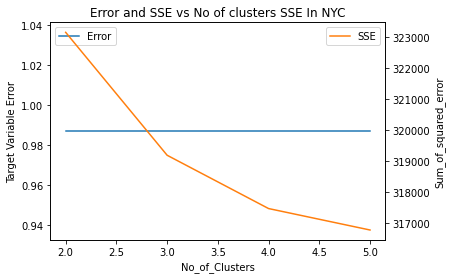

In [307]:
ax = error_values_kmeans_convergence.plot(x='No_of_Clusters', y='Target Variable Error')
ax2 =error_values_kmeans_convergence.plot(x='No_of_Clusters', y='Sum_of_squared_Errors',secondary_y=True, ax=ax)
# set the axis labels and title
ax.set_xlabel('No_of_Clusters')
ax.set_ylabel('Target Variable Error')
ax2.set_ylabel('Sum_of_squared_error')
ax.set_title('Error and SSE vs No of clusters SSE In NYC')
ax.legend(['Error'], loc='upper left')
ax2.legend(['SSE'], loc='upper right')

plt.show()

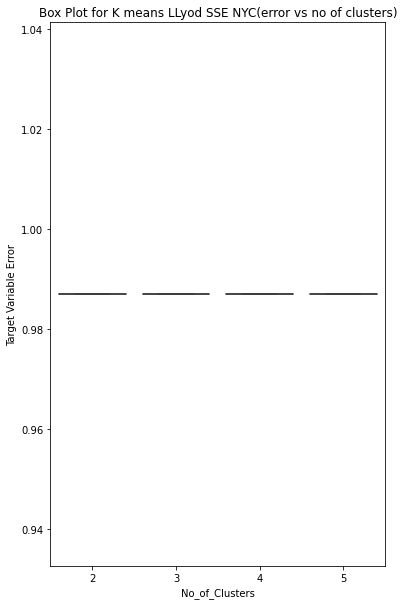

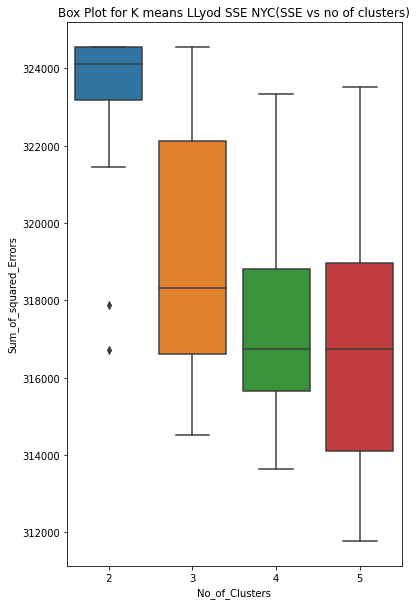

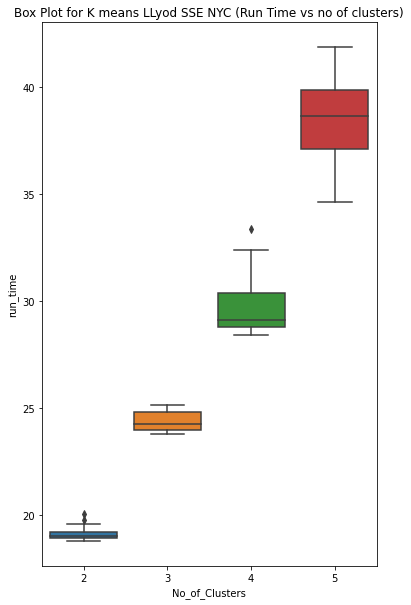

In [284]:
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_convergence_df['No_of_Clusters'],y=error_values_kmeans_convergence_df['Target Variable Error'])
plt.title('Box Plot for K means LLyod SSE NYC(error vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_convergence_df['No_of_Clusters'],y=error_values_kmeans_convergence_df['Sum_of_squared_Errors'])
plt.title('Box Plot for K means LLyod SSE NYC(SSE vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_convergence_df['No_of_Clusters'],y=error_values_kmeans_convergence_df['run_time'])
plt.title('Box Plot for K means LLyod SSE NYC (Run Time vs no of clusters)')
plt.show()


# Entire Dataset

Text(0.5, 1.0, 'NYC_DATASET_SSE')

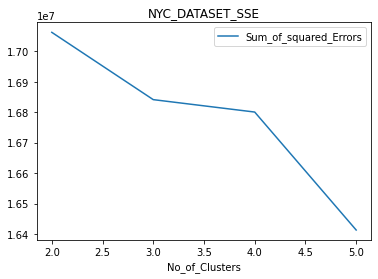

In [297]:
df=pd.read_csv('nyc_Sse_data.csv')
df.plot(x='No_of_Clusters',y='Sum_of_squared_Errors')
plt.title('NYC_DATASET_SSE')

  0%|          | 0/14 [00:00<?, ?it/s]/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
  7%|▋         | 1/14 [02:02<26:28, 122.17s/it]/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
 14%|█▍        | 2/14 [04:24<26:49, 134.12s/it]/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
 21%|██▏       | 3/14 [07:24<28:23, 154.85s/it]/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.war

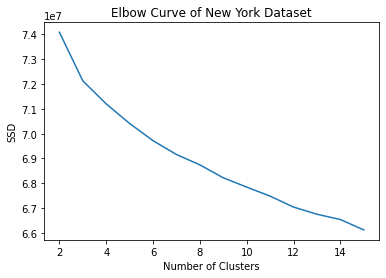

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

# Load data from CSV file
data = count_vectorizer_df
data=data.fillna(0)

# Create a list to hold the Sum of Squared Distances (SSD)
ssd = []

# Create KMeans objects for k=2 to k=16
for k in tqdm(range(2, 16)):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(2, 16), ssd)
plt.title('Elbow Curve of New York Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()


